# Gaussian Discriminant Analysis

Any time we have a classification problem in which the class-conditional data
are nearly Gaussian, this method would be nearly optimal.

To demonstrate, let's generate data from two overlapping 2D Gaussians.

The Gaussian density is defined as

$$p(\mathbf{x}; \mu, \sigma) = \frac{1}{(2\pi)^{(k/2)}|\sigma|^{(1/2)}}e^{-\frac{1}{2}(\mathbf{x}-\mu)\sigma^{-1}(\mathbf{x}-\mu)}$$

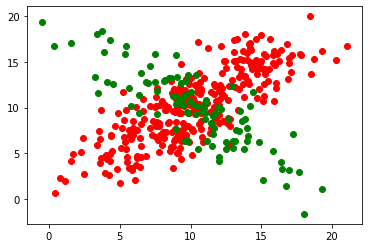

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data

mu1 = np.array([10, 10])
mu2 = np.array([10, 10])

sigma1 = np.array([[15, 12], [12, 15]])
sigma2 = np.array([[15, -12], [-12, 15]])

X1 = np.random.multivariate_normal(mu1, sigma1, 300)
X2 = np.random.multivariate_normal(mu2, sigma2, 100)

plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'go')
plt.show()


Given these data, we estimate the parameters of the GDA from the data.

In [2]:
X = np.concatenate((X1, X2), 0)
y = np.concatenate((np.zeros((X1.shape[0], 1)), np.ones((X2.shape[0], 1))), 0)

In [3]:
def gauss_density(X, mu, sigma):
    k = X.shape[1]
    siginv = np.linalg.inv(sigma)
    d = np.zeros((X.shape[0], 1))
    for i in range(X.shape[0]):
        x = X[i,:]
        d[i] = -0.5 * (x-mu) @ siginv @ (x-mu)
    return (2 * np.pi)**(-k/2) / np.sqrt(np.linalg.det(sigma)) * np.exp(d)


In [4]:

def gda_infer(X,y,means,covariances,p_ys):
    mu_l=[]
    cov_l=[]
    p_y_l=[]
    K=np.unique(y)
    p_y=np.zeros((X.shape[0], len(K)))
    for i in np.arange(len(K)): 
        #Calculate: list of means, list of convariances, list of p_y
        X0=X[np.where(y==i)[0],:]
        mu0=X0.mean(axis=0)
        cov0 = np.cov(X0.T)
        mu_l.append(mu0)
        cov_l.append(cov0)
        p_y_l.append(X0.shape[0]/y.shape[0])
        #Inference
        p_y[:,i:i+1]=gauss_density(X, mu_l[i], cov_l[i])*p_y_l[i]
    return (p_y / p_y.sum(axis=1, keepdims=True)).argmax(axis=1)
    

In [5]:
train_acc = (gda_infer(X,y,None,None,None)==y.reshape(-1)).sum() / X.shape[0]
print('Training accuracy: %f' % train_acc)

Training accuracy: 0.875000
